In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install plotly

nyc_data = pd.read_csv('https://raw.githubusercontent.com/DanielleRomanoff/DS-Unit-1-Project_Dog_Bites/master/NYC%20dog%20bite%20data.csv')
nyc_data.shape

    100% |████████████████████████████████| 37.8MB 311kB/s 
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/danielleromanoff/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


(8707, 9)

In [89]:
nyc_data.sort_values(by = 'Breed').head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
2701,2696,July 17 2016,DOG,/SHIH TZU MIX,3,M,False,Bronx,10457
8260,8261,June 23 2016,DOG,2 DOGS: TERR X & DOBERMAN,3 & 4,F,True,Staten Island,10306
4838,4833,May 11 2017,DOG,AFRICAN BOERBOEL,3,M,False,Manhattan,10025
3899,3895,September 10 2015,DOG,AIREDALE TERRIER,2,M,True,Manhattan,10011
2196,2191,July 09 2015,DOG,AKITA/CHOW CHOW,2,M,False,Bronx,10459


In [90]:
pd.set_option('display.max_rows', 1000)
nyc_data.isna().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed            1
Age           3245
Gender           0
SpayNeuter       0
Borough          0
ZipCode       1864
dtype: int64

In [120]:
nyc_data_new = nyc_data.groupby(['Breed', 'Gender', 'SpayNeuter']).count().sort_values(by = ['Breed', 'UniqueID'], ascending = False)
nyc_data_modified = nyc_data_new.drop(index = ['UNKNOWN', 'Mixed/Other', 'TERRIER', 'MIXED', 'MIXED BREED', 'PIT BULL MIX', 'LABRADOR MIX', 'HUSKY', 'SHEPHERD', 'SHEPERD', 'MUTT', 'TERRIER MIX'])
nyc_bite_data = nyc_data_modified[nyc_data_modified.UniqueID >= 10]
nyc_bite_final = pd.DataFrame(nyc_bite_data, columns = ['UniqueID'])
nyc_bite_final.head(10)

/Users/danielleromanoff/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3111: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



UniqueID
Breed                      Gender SpayNeuter          
Yorkshire Terrier          U      False             79
                           M      True              68
                                  False             41
                           F      False             21
                                  True              21
Staffordshire Bull Terrier M      True              10
Siberian Husky             U      False             43
                           M      False             29
                                  True              28
Shih Tzu                   M      False            117

In [93]:
pa_data = pd.read_csv('https://raw.githubusercontent.com/DanielleRomanoff/DS-Unit-1-Project_Dog_Bites/master/PA%20Dangerous%20Dogs%201996-Current.csv')
pa_data.shape

(5565, 18)

In [119]:
nyc_bite_final.shape

(120, 1)

In [94]:
pa_data.head()

,File Date,Determination Year,Status Description,County Description,Dog Info Age,Dog Info Breed,Dog Info Predator,County Key,Owner County,Court Disposition,Hearing Date,Owner First Name,Owner Last Name,Owner Address,Owner City,Owner State,Owner Zip,Location
0,12/12/2002,2002,Closed,BUCKS (7),2 YRS.,MIXED BREED,Dog,9,BUCKS (7),Guilty,02/28/2003,DAVID,GERSENSON,PO BOX 432,REVERE,PA,18953.0,"PO BOX 432\nREVERE, PA 18953"
1,06/30/2003,2003,Deceased,ALLEGHENY (4),11 YRS.,MIXED BREED,Dog,2,ALLEGHENY (4),Guilty,06/30/2003,SHANEA,NAKONECNY,2208 ORCHARD HILL ROAD,JEFFERSON HILLS,PA,15025.0,"2208 ORCHARD HILL ROAD\nJEFFERSON HILLS, PA 15025"
2,07/09/2003,2003,Deceased,BRADFORD (3),7 YRS.,Rottweiler,Dog,8,BRADFORD (3),Guilty,07/09/2003,THERON,WICKWIRE,"RR 2, BOX 100",WYSOX,PA,18854.0,"RR 2, BOX 100\nWYSOX, PA 18854"
3,06/10/2004,2004,Deceased,WESTMORELAND (4),ADULT,MIXED BREED,Dog,65,WESTMORELAND (4),Guilty,06/10/2004,VERONICA,SIMMS,RT 982 HOUSE 520,NEW DERRY,PA,15627.0,"RT 982 HOUSE 520\nNEW DERRY, PA 15627"
4,06/09/2004,2004,Closed,WYOMING (3),9 YRS.,Labrador Retriever,Dog,66,WYOMING (3),Guilty,06/03/2004,KIMBERLY,MERRYMAN,"RR 1, BOX 81",NOXEN,PA,18636.0,"RR 1, BOX 81\nNOXEN, PA 18636"


In [95]:
pa_data_new = pa_data.groupby(['Dog Info Breed', 'Court Disposition', 'Status Description']).count().sort_values(by = ['Dog Info Breed', 'Location'], ascending = False)
pa_data_modified = pa_data_new.drop(index = ['UNKNOWN', 'OTHER', 'MIXED BREED', 'Mastiff'])
pa_bite_data = pa_data_modified[pa_data_modified['Location'] >= 5]
pa_bite_final = pd.DataFrame(pa_bite_data, columns = ['Location'])
pa_bite_final

/Users/danielleromanoff/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Location
Dog Info Breed                 Court Disposition Status Description             
Weimaraner                     Dismissed         Closed                        5
Staffordshire Bull Terrier     Other             Deceased                      5
Siberian Husky                 Not Guilty        Closed                       15
                               Dismissed         Closed                       14
                               Guilty            Deceased                     11
                               Other             Closed                       11
                               Guilty            Closed                       10
                               Other             Deceased                      8
                               Guilty            Deceased Dog                  6
Saint Bernard - St. Bernard    Not Guilty        Closed                        8
                               Guilty            Deceased                      6
Rottweiler                     Guilty            Deceased                     57
                                                 Closed                       40
                               Not Guilty        Closed                       38
                               Guilty            Deceased Dog                 25
                               Dismissed         Closed                       17
                               Guilty            Euthanized                   16
                               Other             Deceased                     16
                                                 Closed                       14
                               Guilty            Registered                   11
                               Ruling Pending    Pending Determination         8
                               Guilty            Open                          7
MIXED BREED: Pit Bull Mix      Guilty            Euthanized                   26
                                                 Registered                   16
                               Ruling Pending    Pending Determination        12
                               Dismissed         Closed                       11
                               Not Guilty        Closed                       11
                               Other             Closed                       11
                               Guilty            Open                          8
                                                 Deceased Dog                  7
MIXED BREED: Pit Bull          Not Guilty        Closed                        5
Labrador Retriever             Guilty            Deceased                     30
                               Not Guilty        Closed                       25
                               Guilty            Closed                       15
                               Other             Closed                       15
                                                 Deceased                     15
                               Guilty            Euthanized                   13
                               Dismissed         Closed                       10
                               Guilty            Deceased Dog                  9
                                                 Registered                    6
Great Dane                     Guilty            Closed                       10
                               Not Guilty        Closed                        8
                               Guilty            Deceased                      7
Golden Retriever               Not Guilty        Closed                        9
                               Other             Deceased                      7
German Shorthaired Pointer     Not Guilty        Closed                        6
German Shepherd                Guilty            Deceased                     81
                               Not Guilty        Closed                       54
                      

In [96]:
reasons_data = pd.read_csv('https://raw.githubusercontent.com/DanielleRomanoff/DS-Unit-1-Project_Dog_Bites/master/Reasons%20for%20bites%20with%20interpretation.csv')
reasons_data.shape

(11, 3)

In [97]:
reasons_data.head()

,Reason,Researcher,Respondent
0,Protect territory,21.7,31.4
1,Unsure,21.5,16.2
2,Accident,14.2,16.0
3,Dog afraid,8.2,9.0
4,Dog in pain,5.7,6.6


AttributeError: 'Spine' object has no attribute 'set_visable'

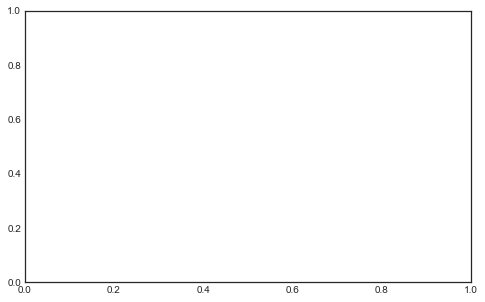

In [100]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize = (8, 5), facecolor = 'white')
ax.grid(False)
ax.spines['right'].set_visable(False)
ax.spines['top'].set_visable(False)

# Line 1
plt.plot(nyc_bite_final['Breed],'], nyc_bite_final['UniqueID'], color = 'purple')
fig.text(0.15, 0.5, 'Breed', size = 'medium', color = 'purple', weight = 'bold')

# Line 2
plt.plot(pa_bite_final['Dog Info Breed'], pa_bite_final['Location'], color = 'red')
fig.text(0.15, 0.5, 'Dog Info Breed', size = 'medium', color = 'red', weight = 'bold')

plt.xticks(['Breed'])

# Title
fig.suptitle('Number of Bites per Breed', fontsize = 15, weight = 'bold', horizontalalignment = 'left', x = 0.15, y = 1)

ax.set_title('Number of each breed registered unknown', horizontalalignment = 'left', x = 0.9, y = 1, fontsize = 10);

In [116]:
import plotly.plotly as py
import matplotlib.plotly.graph_objs as go
data = [go.Bar(x = nyc_bite_final.Breed, y = nyc_bit_final.UniqueID)]
py.iplot(data, filename = 'jupyter-basic_bar')

ModuleNotFoundError: No module named 'matplotlib.pyplot.graph_objs'; 'matplotlib.pyplot' is not a package